In [40]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import requests as req

In [41]:
filepath = Path.home() / "data/explorations/temp_min_sp/serie_metereologica_sp.tsv"

In [42]:
data = (pd.read_csv(filepath, delimiter=";", 
                   decimal=",", parse_dates=["Data"])
          .set_index("Data")
          .assign(Temperatura=lambda x: pd.to_numeric(x["TempBulboSeco"])))
          

In [43]:
y = data["Temperatura"]
x = y.index

In [44]:
this_inds = (x >= "2019-01-01")
#this_inds &= (x < "2019-01-01")
temp1 = y[this_inds].mean()
stemp1 = y[this_inds].std()

In [45]:
other_inds = (x.month < 5)
other_inds |= ((x.month == 5) & (x.day < 6))
other_inds &= x.year > 2010
temp2 = y[other_inds].mean()
stemp2 = y[other_inds].std()

In [46]:
other_inds2 = (x.month < 5)
other_inds2 |= ((x.month == 5) & (x.day < 6))
#other_inds2 &= x.year > 2010
temp3 = y[other_inds2].mean()
stemp3 = y[other_inds2].std()

In [47]:
el_nino_years = [2002, 2004, 2006, 2009, 2014, 2015]
other_inds3 = (x.month < 5)
other_inds3 |= ((x.month == 5) & (x.day < 6))
other_inds3 &= (x.year.isin(el_nino_years))
temp4 = y[other_inds3].mean()
stemp4 = y[other_inds3].std()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


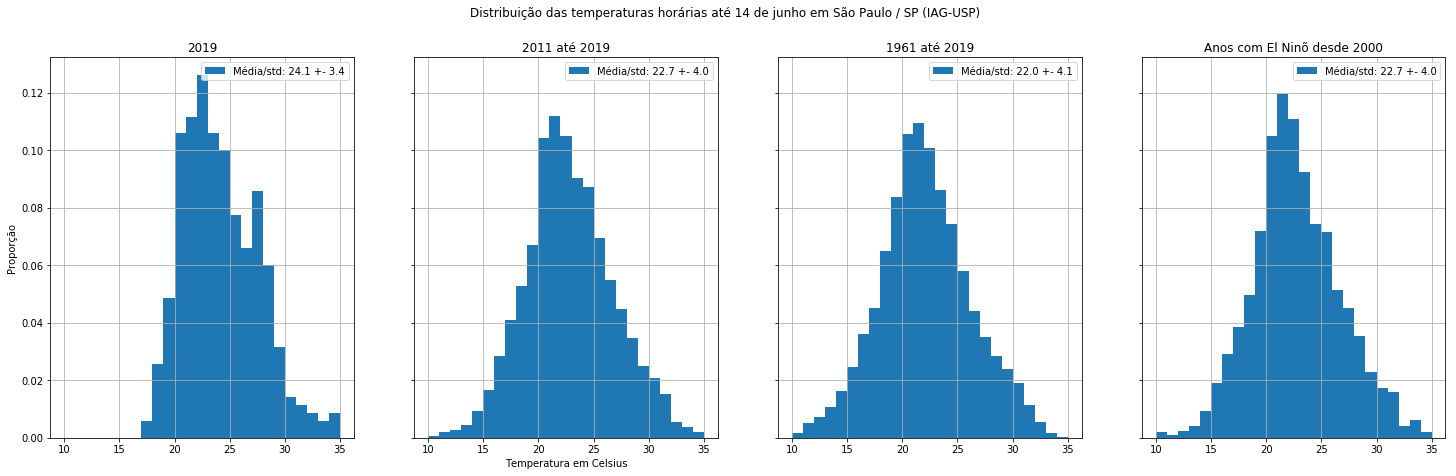

In [48]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 7), sharex=True, sharey=True)

bins = 25
limits = (10, 35)
density = False

ax1.hist(y.values[this_inds], density=True, range=limits, bins=bins, label="Média/std: {:.1f} +- {:.1f}".format(temp1, stemp1))
ax2.hist(y.values[other_inds], density=True,range=limits, bins=bins, label="Média/std: {:.1f} +- {:.1f}".format(temp2, stemp2))
ax3.hist(y.values[other_inds2], density=True,range=limits, bins=bins, label="Média/std: {:.1f} +- {:.1f}".format(temp3, stemp3))
ax4.hist(y.values[other_inds3], density=True,range=limits, bins=bins, label="Média/std: {:.1f} +- {:.1f}".format(temp4, stemp4))

plt.suptitle("Distribuição das temperaturas horárias até 14 de junho em São Paulo / SP (IAG-USP)")

ax1.set_ylabel("Proporção")
ax2.set_xlabel("Temperatura em Celsius")
ax1.set_title("2019")
ax2.set_title("2011 até 2019")
ax3.set_title("1961 até 2019")
ax4.set_title("Anos com El Ninõ desde 2000")

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()